In [188]:
from sklearn.datasets import load_iris
iris = load_iris()
print (digits.data.shape)


(150, 4)


Dataset :Iris

In [189]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(iris.data)
print (kmeans.cluster_centers_.shape)

(10, 4)


K-means clustering is a type of unsupervised learning which is used to classify unlabeled data.

-Assigns each data point to one of the K groups based on features provided.

-Data points are clustered based on similarity.

Results of K-means clustering:
1) Centroids of the clusters.
2) Labels for each data point.

In [190]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

In [191]:
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.9733333333333334

Accuracy determined by how correctly the points are labelled based on their location.

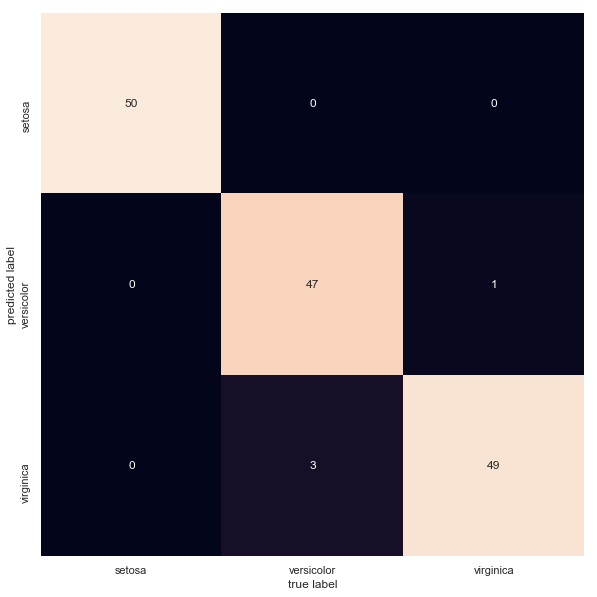

In [192]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=digits.target_names,
            yticklabels=digits.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

0.9133333333333333

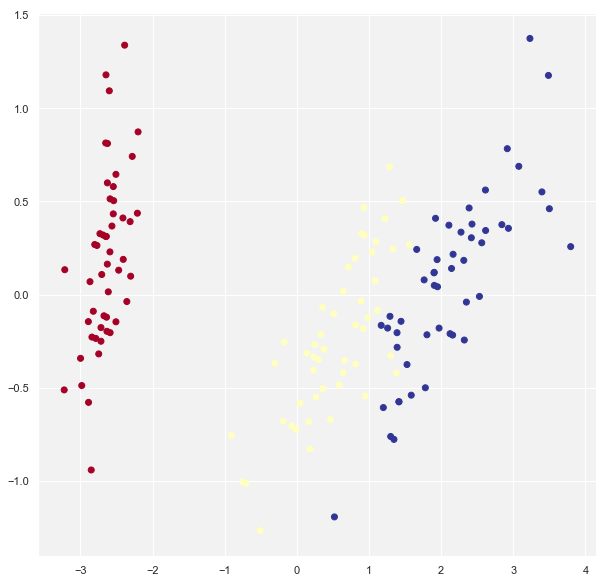

In [193]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

iris_scaled = scaler.fit_transform(iris.data)

from sklearn.decomposition import PCA

X, y = iris.data, iris.target

pca = PCA(n_components=2)
pca.fit(X)
X_reduced = pca.transform(X)

import pylab as pl
pl.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap='RdYlBu')

principal_components = pca.fit_transform(iris_scaled)
                    
iris_proj = pd.DataFrame(data = principal_components, 
                           columns = ['pc_1', 'pc_2'])

kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(iris_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(iris.target, labels)

PCA is used for dimensionality reduction in data. The fit learns some quantities from the data rather than predicting it. I.e., it "learns" the components and the variance between points. PCA removes information along the least important axes and preserves only components of the data with high variance.

In [194]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, init='random', random_state=0)
iris_proj = tsne.fit_transform(iris.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(iris_proj)

# Permute the labels
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    labels[mask] = mode(iris.target[mask])[0]

# Compute the accuracy
accuracy_score(iris.target, labels)

0.9733333333333334

t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features.

ready


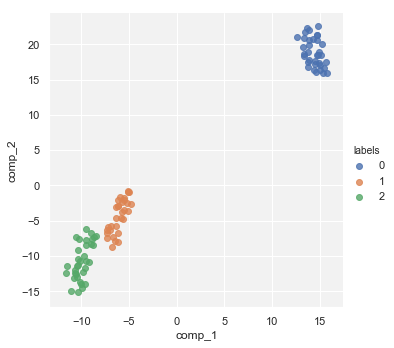

In [195]:

import matplotlib

proj = pd.DataFrame(iris_proj)
proj.columns = ["comp_1", "comp_2"]
proj["labels"] = labels
sns.lmplot("comp_1", "comp_2", hue = "labels", data = proj.sample(100) ,fit_reg=False)
print("ready")